Project code

In [25]:
!pip install astral
!pip install skyfield

In [26]:
from astral import LocationInfo
from astral.moon import phase as moon_phase
from datetime import datetime
import numpy as np
from skyfield.api import load, Topos
import matplotlib.pyplot as plt

In [28]:
# Function to estimate moon illumination based on its phase
def get_moon_illumination(phase):
    """Returns approximate lux intensity based on moon phase."""
    # Lux values based on different moon phases (approximate)
    lux_values = {0: 0.3,  # New Moon
                  1: 0.2,  # Waxing Crescent
                  7: 0.03, # First Quarter
                  14: 0.25, # Full Moon
                  21: 0.03, # Last Quarter
                  28: 0.2}  # Waning Crescent
    return lux_values.get(phase, 0.1)  # Default for intermediate phases

In [29]:
# Define observer location in the North Atlantic
# Example coordinates: 50N, 30W
observer = Topos(latitude_degrees=50.0, longitude_degrees=-30.0)

In [30]:
# Load astronomical data
eph = load('de421.bsp')  # Ephemeris data
ts = load.timescale()

In [31]:
# Get current time
date = datetime.utcnow()
t = ts.utc(date.year, date.month, date.day, date.hour, date.minute, date.second)

/tmp/ipykernel_2035/3170271221.py:2: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  date = datetime.utcnow()


In [33]:
# Compute moon and sun positions
moon = eph['moon']
sun = eph['sun']  # Ensure we also get the Sun's position
earth = eph['earth']

astro_position = earth + observer

# Observe the Moon and Sun from the observer's position
moon_pos = astro_position.at(t).observe(moon).apparent()
sun_pos = astro_position.at(t).observe(sun).apparent()

# Compute the phase angle
phase_angle = moon_pos.separation_from(sun_pos)

In [34]:
# Compute fractional illumination (Skyfield provides this directly)
fractional_illumination = (1 + np.cos(np.radians(phase_angle.degrees))) / 2

In [35]:
# Improved Lux Calculation using Scientific Model
lux_intensity = 10**(-1.93 + 0.419 * fractional_illumination + 0.026 * fractional_illumination**2)

In [36]:
# Simulate optical observation - Basic Target Visibility
# Assuming a 15m long target with reflectivity of 0.7 (low reflectance on dark water)
target_size = 15  # meters
reflectivity = 0.7  # Fraction of light reflected

In [37]:
# Compute basic visibility metric (lux * reflectivity * target size)
visibility_score = lux_intensity * reflectivity * target_size

In [38]:
# Print results
print(f"Date: {date}")
print(f"Fractional Illumination: {fractional_illumination:.3f} (0 = New, 1 = Full)")
print(f"Estimated Lux Intensity: {lux_intensity:.3f} lux")

Date: 2025-04-03 19:42:08.637159
Fractional Illumination: 0.639 (0 = New, 1 = Full)
Estimated Lux Intensity: 0.022 lux


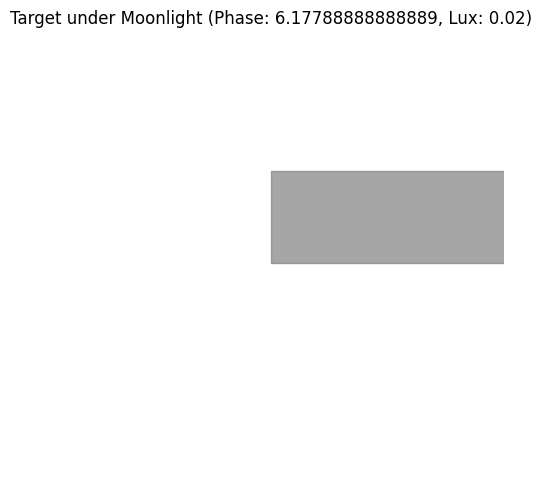

In [45]:
# Render simple scene
fig, ax = plt.subplots(figsize=(6, 6))
ax.set_facecolor("black")  # Dark background
ax.set_facecolor('black')  # Set the axis background to black
ax.add_patch(plt.Rectangle((0, 0), 15, 2, color='gray', alpha=reflectivity))  # Target
plt.xlim(-10, 10)
plt.ylim(-5, 5)
plt.title(f"Target under Moonlight (Phase: {phase}, Lux: {lux_intensity:.2f})")
plt.axis("off")
plt.show()

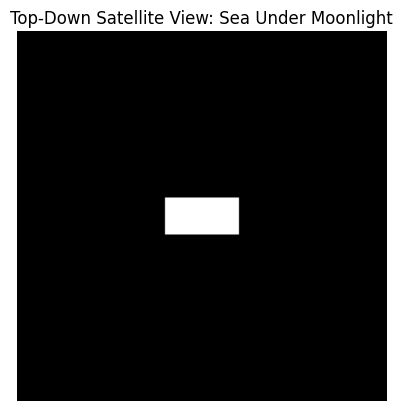

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Moonlight conditions 
lux_intensity = 0.25  # full moon
reflectivity_sea = 0.05  
reflectivity_target = 0.6  

img_size = (200, 200)

# Create sea background
sea = np.ones(img_size) * lux_intensity * reflectivity_sea

# Add target
target_size = (20, 40)  
target_position = (90, 80)  


sea[target_position[0]:target_position[0]+target_size[0],
    target_position[1]:target_position[1]+target_size[1]] = lux_intensity * reflectivity_target

# Display the simulation
plt.imshow(sea, cmap='gray', origin='upper')
plt.title("Top-Down Satellite View: Sea Under Moonlight")
plt.axis('off')
plt.show()
